# Описание проекта

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

Необходимо Приоритизируйте гипотезы, запустить A/B-тест и проанализировать результаты. 

# Содержание работы

* График кумулятивной выручки по группам. Выводы и предположения.
* График кумулятивного среднего чека по группам. Выводы и предположения.
* График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
* График кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения.
* График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения.
* Точечный график количества заказов по пользователям. Выводы и предположения.
* Посчитаны 95-й и 99-й перцентили количества заказов на пользователя. Выбрана граница для определения аномальных пользователей.
* Построен точечный график стоимостей заказов. Выводы и предположения.
* Посчитан 95-й и 99-й перцентили стоимости заказов. Выбрана границу для определения аномальных заказов.
* Посчитана статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения.
* Посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
* Посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаны выводы и предположения.
* Посчитана статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаны выводы и предположения.
Принято решение по результатам теста.

# Описание данных

Файл /datasets/hypothesis.csv.
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv.
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Приоритезация гипотез

Для начала загрузим все необходимые библиотеки

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

Откроем первую таблицу с гипотезами

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 1000 # добавил, что бы отображался весь первый столбец
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Для приоритизации используем методы ICE и RICE

In [3]:
hypothesis['ICE'] = round(hypothesis['Impact'] * 
                     hypothesis['Confidence'] / 
                     hypothesis['Efforts'], 2)
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Видно, что на первом месте стоит гипотеза, об акции на скидку на товар в день рождения. А вот изменение фона главной странциы имеет очень низкий приоритет. Проверим RICE.

In [4]:
hypothesis['RICE'] = round(hypothesis['Reach'] * 
                      hypothesis['Impact'] * 
                      hypothesis['Confidence'] / 
                      hypothesis['Efforts'], 2)
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


В ТОП 5 попали все те же гипотезы, однако поменялся их порядок. Так например лидер метода ICE - гипотеза о скидке на ДР оказалась на 5 месте из-за показателя REACH в 1 балл. На первое место вырвалась гипотеза "добавить форму подписки на все основные странциы, чтобы собрать базу клиентов для email рассылок". Параметр REACH (вовлеченность) слишком важен, что бы его игнорировать, так что будем ориентироваться на результаты анализа RICE. 

Таким образом, в первую очередь следует протестировать следующие гипотезы:

* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

# Предобработка данных

Посмотрим на таблицы с данными

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


На первый взгляд пропусков нет. Необходимо привести столбец date  к нужному формату. Проверим на дубликаты и пропуски. 

In [7]:
orders.duplicated().sum()

0

In [8]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [9]:
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Пропусков нет, дубликатов нет. Данные приведены к нужному формату. Сделаем то же самое, с таблицей visitors.

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.duplicated().sum()

0

In [14]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [15]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Пропусков и дубликатов нет. Даныные приведены к нужным формам. 

# Анализ A/B теста

Создам уникальные пары кумулятивных значений.

In [17]:
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [18]:
ordersAggregated = datesGroups.apply(lambda x: 
                                     orders[np.logical_and(orders['date'] <= x['date'], 
                                                           orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transactionId' : 'nunique', 
                                           'visitorId' : 'nunique', 
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [19]:
visitorsAggregated = datesGroups.apply(lambda x: 
                                       visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                               visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 
                                             'group' : 'max', 
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [20]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.head()

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [21]:
len(orders.groupby('visitorId', as_index=False)
    .agg({'group':'nunique'}).query('group > 1'))

58

58 занчений попадают в обе группы.

Для удобства переименую столбцы.

In [22]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построю графики.

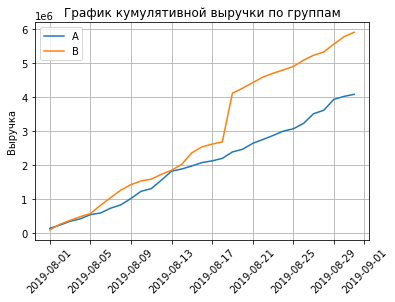

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'] # для группы A
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'] # для группы B

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам');

Видно, что группа B стабильно выше группы A по выручке. 
По графику виден скачок выручки в августе. Это может быть вызвано увеличением количества заказов или резким ростом среднего чека (анамально дорогие заказы). Проверим средний чек.

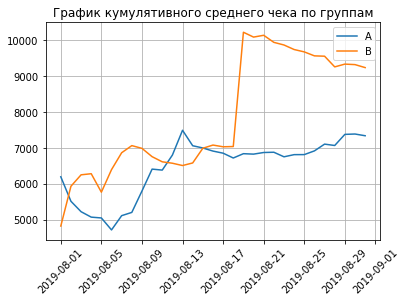

In [24]:
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], 
         label='A')
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], 
         label='B')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам');

Видно, что в августе был резкий рост среднего чека у группы B. Таким образом гипотеза об анамально доргих заказах подтвердилась.

# График относительного изменения кумулятивного среднего чека

Построю график относительного изменения среднего чека B к A.

In [25]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

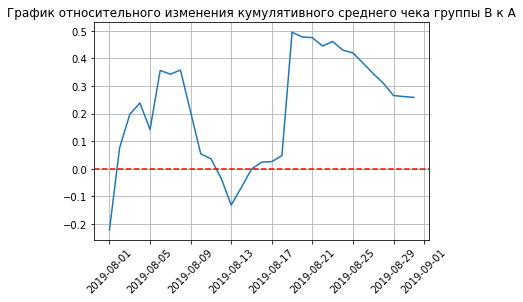

In [26]:
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / 
         (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)
plt.grid()
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к A')
plt.axhline(y=0, color='red', linestyle='--');

В целом срдений чек группы B выше, чем группы A. Однако после 6 августа видно снижение, и срдений чек В стал меньше, чем в А. Потом был резкий рост, и затем опять началось падение, однако уже не такое стремительное.

# График кумулятивной конверсии

In [27]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors'] # комулятивная конверсия

In [28]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B'] # фильтрую данные

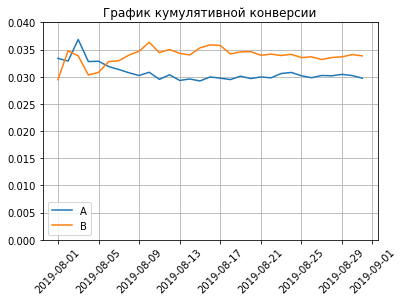

In [29]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.title('График кумулятивной конверсии')
plt.ylim(0, 0.04);

По графику видно, что конверсия группы А в среднем 30%, а у группы В - 35%.

# График относительного изменения кумулятивной конверсии

In [30]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], 
                                      left_on='date', 
                                      right_on='date', 
                                      how='left', 
                                      suffixes=['A', 'B']))

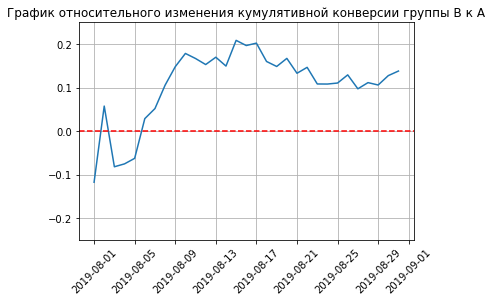

In [31]:
plt.plot(mergedCumulativeConversions['date'],
        mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1)
plt.grid()
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии группы B к A')
plt.axhline(y=0, color='red', linestyle='--')
plt.ylim(-0.25, 0.25);

Из графика видно, что конверсия группы B стабильно выше, чем группы A. 

# Точечный график количества заказов по пользователям

In [33]:
ordersByVisitors = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByVisitors.columns = ['visitorId', 'orders']
ordersByVisitors

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


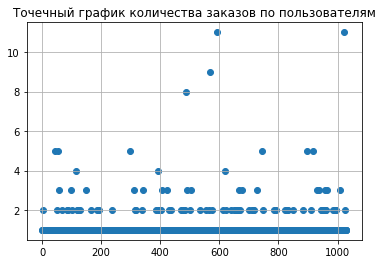

In [34]:
x_values = pd.Series(range(0, len(ordersByVisitors)))

plt.scatter(x_values, ordersByVisitors['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.grid();

Видно, что большая часть заказов в диапазоне от 1 до 5. Есть несколько человек с заказами 8-10, но это явно аномалии.

# 95-й и 99-й перцентили количества заказов на пользователя

In [35]:
np.percentile(ordersByVisitors['orders'], [95, 99])

array([2., 4.])

95% разместили до 2 заказов включительно, а 99% пользователей - до 4 заказов включительно. Будем считать аномалиями 5 и более заказов.

# Tочечный график стоимостей заказов

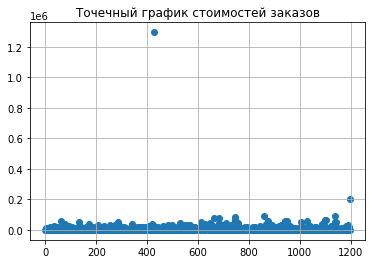

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('Tочечный график стоимостей заказов');

Заказ стоимостью 1,2 млн - анамолия или ошибка данных.

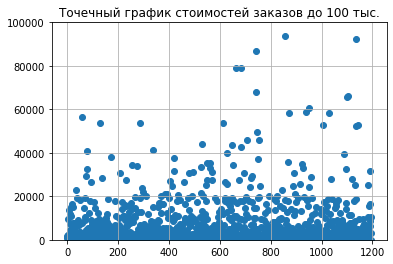

In [37]:
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('Tочечный график стоимостей заказов до 100 тыс.')
plt.ylim(0, 100000);

В основном заказы до 40 тысяч рублей. 

# 95-й и 99-й перцентили стоимости заказов

In [38]:
np.percentile([orders['revenue']], [95, 99])

array([28000. , 58233.2])

Стоимость заказов у 95% пользователей - до 28 тысяч, а у 99% пользователей - до 58 тысяч. Определим аномальный заказ от 40 тысяч рублей.

# Различия в среднем количестве заказов по сырым данным

Определим гипотезы: 
* H0 - среднее количество заказов между группами одинаковое
* H1 - срденее количество заказов между группами разные

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

display(visitorsADaily.head())
visitorsBDaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [40]:
visitorsACummulative = visitorsADaily.apply(lambda x: 
                                            visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateA': 'sum'}),
                                            axis=1)

visitorsBCummulative = visitorsBDaily.apply(lambda x: 
                                            visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateB': 'sum'}),
                                            axis=1)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

display(visitorsACummulative.head())
visitorsBCummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [41]:
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

display(ordersADaily.head())
ordersBDaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [42]:
ordersACummulative = ordersADaily.apply(lambda x: 
                                        ordersADaily[ordersADaily['date'] <= x['date']]
                                        .agg({'date': 'max', 
                                              'ordersPerDateA': 'sum', 
                                              'revenuePerDateA': 'sum'}),
                                        axis=1).sort_values(by=['date'])

ordersBCummulative = ordersBDaily.apply(lambda x: 
                                        ordersBDaily[ordersBDaily['date'] <= x['date']]
                                        .agg({'date': 'max', 
                                              'ordersPerDateB': 'sum', 
                                              'revenuePerDateB': 'sum'}), 
                                        axis=1).sort_values(by=['date'])

ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA',]
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB',]

display(ordersACummulative.head())
ordersBCummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [43]:
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [45]:
# Посчитаю, сколько заказов совершил каждый пользователь.

ordersByUsersA = (orders[orders['group'] == 'A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': 'nunique'}))

ordersByUsersB = (orders[orders['group'] == 'B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': 'nunique'}))

ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB.columns = ['visitorId', 'orders']

In [46]:
# Подготовим данные для пользователей с 0 заказов.

zerosA = pd.Series(0, np.arange(data['visitorsPerDateA'].sum() - 
                                len(ordersByUsersA['orders'])), name='orders')
zerosB = pd.Series(0, np.arange(data['visitorsPerDateB'].sum() - 
                                len(ordersByUsersB['orders'])), name='orders')

# Создадим выборки.

sampleA = pd.concat([ordersByUsersA['orders'], zerosA], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], zerosB], axis=0)

In [47]:
# Применим U-критерий Манна-Уитни.

results = st.mannwhitneyu(sampleA, sampleB)
print('p-value: ', round(results[1], 3))

p-value:  0.017


In [48]:
# Оценим результаты критерия.

alpha = 0.05 # критический уровень статистической значимости

if results[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

Отвергаем нулевую гипотезу: разница статистически значима.


In [49]:
# Посмотрим на отношение среднего числа заказов группы В к А.

sampleB.mean() / sampleA.mean()

1.1380788465532015

По сырым данным можно сделать вывод, что среднее количество заказов в группе А и В различное. Среднее число заказов в группе В больше среднего числа заказов группа А на 14%.

# Различия в среднем чеке по сырым данным

Выделим гипотезы:
* H0 - средние чеки равны
* H1 - средний чеки неравны

In [50]:
sampleA = orders[orders['group'] == 'A']['revenue']
sampleB = orders[orders['group'] == 'B']['revenue']

In [51]:
results = st.mannwhitneyu(sampleA, sampleB)
print('p-value: ', round(results[1], 3))

p-value:  0.729


In [52]:
if results[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.


In [53]:
sampleB.mean() / sampleA.mean()

1.2587136699126005

P-value (0.73) больше критического значения (0.05), значит, нулевую гипотезу отвергнуть нельзя: средний чек группы А равен среднему чеку группы В.

# Различия в среднем количестве заказов по очищенным данным

Выделим гипотезы: 
* H0 - срденее количество заказов равны
* H1 - срденее количество заказов неравны

Выше были определены параметры, которые мы считаем аномальными - исключим их из дальнейшего исследования.

In [54]:
abnormal_orders = 5

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= abnormal_orders]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] >= abnormal_orders]['visitorId']], 
                                axis=0)

In [55]:
abnormal_revenue = 40000

usersWithExpensiveOrders = orders[orders['revenue'] > abnormal_revenue]['visitorId']

In [56]:
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], 
                           axis=0)
                 .drop_duplicates()
                 .sort_values())

In [57]:
display(abnormalUsers.shape[0])
abnormalUsers.shape[0] / orders['visitorId'].nunique()

29

0.028128031037827354

Всего у нас 29 пользователей с аномальными заказами, это 2.8% от общего количества пользователей, разместивших заказы.

In [58]:
filteredordersA = ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders']
filteredordersB = ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders']

In [59]:
zerosA = pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                      len(ordersByUsersA['orders'])), name='orders')
zerosB = pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                                      len(ordersByUsersB['orders'])), name='orders')

In [60]:
# Создадим выборки.

sampleAFiltered = pd.concat([filteredordersA, zerosA], axis=0)
sampleBFiltered = pd.concat([filteredordersB, zerosB], axis=0)

In [61]:
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value: ', round(results[1], 4))

p-value:  0.0097


In [62]:
sampleBFiltered.mean() / sampleAFiltered.mean()

1.1657410955512135

По очищенным данным p-value  0.0097, меньше критического уровня (0.05), значит, мы можем отвергнуть нулевую гипотезу о равенстве среднего количества заказов в группах А и В. По очищенным данным среднее число заказов в группе В больше среднего числа заказов группа А на 17% (вместо 14% по сырым данным).

# Различия в среднем чеке по очищенным данным

Выделим гипотезы: 
* H0 - средние чеки равны
* H1 - средние чеки неравны

In [63]:
filteredordersA = orders[np.logical_and(orders['group'] == 'A', 
                      np.logical_not(orders['visitorId']
                                     .isin(abnormalUsers)))]['revenue'] # группа А

filteredordersB = orders[np.logical_and(orders['group'] == 'B', 
                      np.logical_not(orders['visitorId']
                                     .isin(abnormalUsers)))]['revenue'] # группа В

In [64]:
results = st.mannwhitneyu(filteredordersA , filteredordersB)

print('p-value: ', round(results[1], 3))

p-value:  0.612


In [65]:
filteredordersB.mean() / filteredordersA.mean()

1.0687874220282685

Значение не пощволяет отвергнуть нулевую гипотезу. Средние чеки равны.

# Результаты теста

По результатам теста можно сделать следующие выводы:

* Есть статистически значимое различие между средним количеством заказов групп А и В. В группе В среднее количество заказов на одного пользователя выше.
* Нет статистически значимой разницы между средним чеком групп А и В.
* Конверсия группы В лучше конверсии группы А.
* Исходя из результатов теста стоит остановить тест. Признать группу B более успешным исходом теста. 